In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model, load_model 
# from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [21]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [131]:
test=pd.read_csv("../data/R03/ÏπòÌÇ®_R03.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      2000 non-null   object 
 1   ID            2000 non-null   object 
 2   Post_num      2000 non-null   float64
 3   Followers     2000 non-null   float64
 4   Contents      2000 non-null   object 
 5   Tags          2000 non-null   object 
 6   Tags_sum      2000 non-null   int64  
 7   Tags_count    2000 non-null   int64  
 8   Tags_rate     2000 non-null   float64
 9   Likes         2000 non-null   int64  
 10  Scaled_likes  2000 non-null   float64
 11  Contents_len  2000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


In [132]:
test.head()

Category                ID  Post_num  Followers  \
0       ÏπòÌÇ®           z.e.o.m     236.0     8603.0   
1       ÏπòÌÇ®  foodgangster_fgg     128.0     3360.0   
2       ÏπòÌÇ®    bboong_bbang_2     741.0     6928.0   
3       ÏπòÌÇ®         dhrkspths    2178.0    27000.0   
4       ÏπòÌÇ®       a_a_bl0s2om     606.0     1020.0   

                                            Contents  \
0  Îë•Í∑ºÌï¥ ÎåÄÏã† Ïò¨Ìï¥Îäî  ÎèôÍ∑º Ìï¥Í∞Ä Îñ¥ÏäµÎãàÎã§  Ïö∞ÎèôÏÇ¨Î¶¨Ïóê ÏπòÎ∞•ÍπåÏßÄ ÏπòÌÇ®ÏúºÎ°ú ÌíÄÏΩîÏä§ Ï¶êÍ∏∞...   
1   ÌòëÏ∞¨  Îñ°Î≥∂Ïù¥Ïóê ÌÉÄÌîºÏò§Ïπ¥ ÌéÑ ÏèüÏùÄ Ï§Ñ ÏïåÏïòÎã§  Î≤ÑÎ∏îÌã∞Í∞ôÏùÄ Îñ°Î≥∂Ïù¥Îã§  Îß•Ï£ºÎ•º Î∂ÄÎ•¥Îäî...   
2  ÎèºÏßÄ ÏÇ¨Î£å ÏùºÏßÄ   506  ÏßÄÏΩîÎ∞î ÏÑ±Ï†ïÏ†êÎø°ÎπµÏì∞Í∞Ä Ïä§Ìä∏Î†àÏä§ Î∞õÏúºÎ©¥ Ï£ºÍ∏∞Ï†Å ÏàòÌòàÌïòÎäî ...   
3                         ÏñºÎßàÎÇò ÎßõÏûàÏóàÏúºÎ©¥ Ìè¨Ïû•ÍπåÏßÄ„Ñ∑„Ñ∑„Ñ∑    Î≤îÎß•Ï£º ÏûÑ   
4    ÎÖ∏ÎûëÌÜµÎã≠„Üç„Üç„Üç ÎåÄÍµ¨ÎßõÏßë  Î®πÎ∞©  instafood  ÏöîÎ¶¨Ïä§ÌÉÄÍ∑∏Îû®  ÏöîÎ¶¨  ÎßõÏä§ÌÉÄ...   

                                                Tags  Tags_sum  Tags_count  \
0  #ÎèôÍ∑ºÏù¥ÏàØÎ∂àÎëêÎßàÎ¶¨ÏπòÌÇ®, #ÎèôÍ∑ºÏù¥ÏàØÎ∂àÎëêÎßàÎ¶¨ÏπòÌÇ®, #ÏπòÌÇ®, #ÏπòÌÇ®ÎßõÏßë, #Î∞∞Îã¨ÏπòÌÇ®, #...        11           3   
1  #ÏπòÌÇ®Îß§ÎãàÏïÑ, #Ìë∏ÎìúÍ∞±_Î∞∞Îã¨, #Î∞∞Îã¨ÎßõÏßë, #ÏπòÌÇ®ÎßõÏßë, #Îñ°Î≥∂Ïù¥ÎßõÏßë, #Î∞∞Îã¨ÏùåÏãùÏ∂îÏ≤ú...         9           3   
2                                                            0           0   
3                                                            0           0   
4  #ÎåÄÍµ¨ÎßõÏßë, #Î®πÎ∞©, #instafood, #ÏöîÎ¶¨Ïä§ÌÉÄÍ∑∏Îû®, #ÏöîÎ¶¨, #ÎßõÏä§ÌÉÄÍ∑∏Îû®, ...        28           8   

   Tags_rate  Likes  Scaled_likes  Contents_len  
0      27.27   1040      0.175646           477  
1      33.33    109      0.018409           262  
2       0.00    109      0.018409           511  
3       0.00      9      0.001520            26  
4      28.57     19      0.003209           193

In [133]:
### ÌÉúÍ∑∏Ïóê ÏùºÏÉÅÏùÑ Ìè¨Ìï®Ìïú Í≤åÏãúÎ¨º

daily = test[test["Tags"].str.contains("(ÏùºÏÉÅ)")]
daily

C:\Users\user\AppData\Local\Temp\ipykernel_11872\4228455085.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  daily = test[test["Tags"].str.contains("(ÏùºÏÉÅ)")]


Category               ID  Post_num  Followers  \
12         ÏπòÌÇ®    friendlyleung    5877.0     1717.0   
13         ÏπòÌÇ®    friendlyleung    5877.0     1717.0   
17         ÏπòÌÇ®  e.cla.tant__bob     235.0      146.0   
37         ÏπòÌÇ®     mukjasa._.03     255.0     1793.0   
65         ÏπòÌÇ®         meokksta    1196.0      305.0   
...       ...              ...       ...        ...   
1977       ÏπòÌÇ®          im._nan      16.0        8.0   
1979       ÏπòÌÇ®     sungwhancho7    2027.0     1787.0   
1982       ÏπòÌÇ®       jolee20208     869.0      844.0   
1984       ÏπòÌÇ®        juhee2020     307.0       77.0   
1985       ÏπòÌÇ®         dony___j     191.0      311.0   

                                               Contents  \
12    2022   10   16Ï†ÄÎÖÅ   Noodles with Fishballs  Mea...   
13    2022   10   10Ï†ÄÎÖÅ              Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú___________...   
17    ÌÅ¨ÌÅ¨ÌÅ¨ ÏπòÌÇ® ÎßõÏûàÎã§  ÎßõÏßë Ïã†ÌòºÎ∂ÄÎ∂Ä Ïã†Ìòº Î∂ÄÎ∂Ä ÏùºÏÉÅ Î∂ÄÎ∂ÄÏä§ÌÉÄÍ∑∏Îû® Ïã†ÌòºÎ∂ÄÎ∂ÄÎ∞•ÏÉÅ Ïã†ÌòºÎ∂Ä...   
37        Î®πÏä§ÌÉÄÍ∑∏Îû®  Î®πÏä§ÌÉÄ  ÎåÄÍµ¨  ÏàòÏÑ±Íµ¨  Î≤îÏñ¥Îèô  ÎßõÏßëÏ∂îÏ≤ú  ÎßõÏßëÏä§ÌÉÄÍ∑∏Îû®  ÎèÑÎ¶¨...   
65     Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  bbqÌô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  ÏπòÌÇ®  ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®  ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®  ÌÜµÎã≠  ...   
...                                                 ...   
1977    ÏπòÌÇ®    ÎèÑÏûêÍ∏∞  Í∑∏Î¶á  ÎèÑÏûêÍ∏∞Í∑∏Î¶á  ÏπòÌÇ®  ÏÇ¨ÏßÑ  Ï†ÄÎÖÅ  Ï†êÏã¨  Î©îÎâ¥  Î©îÎâ¥...   
1979  ÏπòÌÇ®ÏùÄ Í∞ÑÎã®ÌûàÏïÑÏãúÏ£†  ÏπòÌÇ®ÏùÄ Îä¶ÏùÑÏàòÎ°ù ÎßõÎÇòÎã§ÍµêÏ¥å ÌóàÎãàÏΩ§Î≥¥Îäî Î∞îÏÇ≠ÌïòÍ≥† Îã¨Í≥† Ïß≠Ï°∞Î¶Ñ Ïù∏...   
1982  ÌÅ∞Îî∏Ïù¥ ÌïúÌÑ± ÎÇ∏ÏπòÌÇ®Îã§Ïª∏ÎÑ§ Ïö∞Î¶¨Îî∏ Í≥†ÎßàÏõå      ÏπòÌÇ® ÏïºÏãùÏä§ÌÉÄÍ∑∏Îû® ÎßõÏûàÎã§Í∑∏Îû® Î®πÎ∞© ...   
1984   Î∂ÄÏÇ∞ BHC BHCÍ≥®ÎìúÌÇπ ÏπòÌÇ® ÏùºÏÉÅÍ≥µÏú† ÏùåÏãùÏä§ÌÉÄÍ∑∏Îû®  Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû® ÎßõÏûàÎã§Í∑∏Îû®  Ïïº...   
1985  Ïö¥ÎèôÌïòÍ≥† Î®πÎäî Ìï©Î≤ïÏ†Å  Îã®Î∞±Ïßà  Ï£ºÎ∂Ä1Îã® ÏùºÏÉÅ daily ÏßÅÏû•Ïù∏ Ïö¥Îèô Ïò§Ïö¥ÏôÑ Îã®Î∞±Ïßà...   

                                                   Tags  Tags_sum  Tags_count  \
12    #Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú________________________, #dinner, #dads...        30           8   
13    #Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú________________________, #dinner, #dads...        30           8   
17    #ÎßõÏßë, #Ïã†ÌòºÎ∂ÄÎ∂Ä, #Ïã†Ìòº, #Î∂ÄÎ∂Ä, #ÏùºÏÉÅ, #Î∂ÄÎ∂ÄÏä§ÌÉÄÍ∑∏Îû®, #Ïã†ÌòºÎ∂ÄÎ∂ÄÎ∞•ÏÉÅ, #...        12           3   
37    #Î®πÏä§ÌÉÄÍ∑∏Îû®, #Î®πÏä§ÌÉÄ, #ÎåÄÍµ¨, #ÏàòÏÑ±Íµ¨, #Î≤îÏñ¥Îèô, #ÎßõÏßëÏ∂îÏ≤ú, #ÎßõÏßëÏä§ÌÉÄÍ∑∏Îû®,...        29           8   
65    #Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®, #bbqÌô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®, #ÏπòÌÇ®, #ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®, #ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®, ...        25          10   
...                                                 ...       ...         ...   
1977  #üêîÏπòÌÇ®..., #ÎèÑÏûêÍ∏∞, #Í∑∏Î¶á, #ÎèÑÏûêÍ∏∞Í∑∏Î¶á, #ÏπòÌÇ®, #ÏÇ¨ÏßÑ, #Ï†ÄÎÖÅ, #Ï†êÏã¨...        31           6   
1979  #Ïù∏Ïä§ÌÉÄ, #instadaily, #Î®πÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏßë, #Î®πÏä§ÌÉÄÎßûÌåî...        25           6   
1982   #ÏπòÌÇ®, #ÏïºÏãùÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏûàÎã§Í∑∏Îû®, #Î®πÎ∞©, #ÏùºÏÉÅÏöîÎ¶¨Í∑∏Îû®, #Î®πÌåî, #Î®πÌåîÏä§ÌÉÄÍ∑∏Îû®         7           3   
1984  #Î∂ÄÏÇ∞, #BHC, #BHCÍ≥®ÎìúÌÇπ, #ÏπòÌÇ®, #ÏùºÏÉÅÍ≥µÏú†, #ÏùåÏãùÏä§ÌÉÄÍ∑∏Îû®, #Î®πÎ∞©Ïä§ÌÉÄ...        12           3   
1985  #Ï£ºÎ∂Ä1Îã®, #ÏùºÏÉÅ, #daily, #ÏßÅÏû•Ïù∏, #Ïö¥Îèô, #Ïò§Ïö¥ÏôÑ, #Îã®Î∞±Ïßà, #ÏπòÌÇ®...        10           3   

      Tags_rate  Likes  Scaled_likes  Contents_len  
12        26.67     10      0.001689           306  
13        26.67     27      0.004560           243  
17        25.00      2      0.000338            67  
37        27.59     16      0.002702           200  
65        40.00     11      0.001858           200  
...         ...    ...           ...           ...  
1977      19.35     15      0.002533           214  
1979      24.00     72      0.012160           218  
1982      42.86     65      0.010978            62  
1984      25.00      8      0.001351            88  
1985      30.00     14      0.002364            61  

[280 rows x 12 columns]

In [134]:
# Ï§ëÎ≥µ ÏïÑÏù¥Îîî Ï†úÍ±∞Ìï® -> ÌèâÍ∑† ÌåîÎ°úÏõå Ïàò
daily_2 = daily.drop_duplicates(['ID'], keep='first')
daily_2

Category               ID  Post_num  Followers  \
12         ÏπòÌÇ®    friendlyleung    5877.0     1717.0   
17         ÏπòÌÇ®  e.cla.tant__bob     235.0      146.0   
37         ÏπòÌÇ®     mukjasa._.03     255.0     1793.0   
65         ÏπòÌÇ®         meokksta    1196.0      305.0   
71         ÏπòÌÇ®  francken_sinwol      17.0       34.0   
...       ...              ...       ...        ...   
1977       ÏπòÌÇ®          im._nan      16.0        8.0   
1979       ÏπòÌÇ®     sungwhancho7    2027.0     1787.0   
1982       ÏπòÌÇ®       jolee20208     869.0      844.0   
1984       ÏπòÌÇ®        juhee2020     307.0       77.0   
1985       ÏπòÌÇ®         dony___j     191.0      311.0   

                                               Contents  \
12    2022   10   16Ï†ÄÎÖÅ   Noodles with Fishballs  Mea...   
17    ÌÅ¨ÌÅ¨ÌÅ¨ ÏπòÌÇ® ÎßõÏûàÎã§  ÎßõÏßë Ïã†ÌòºÎ∂ÄÎ∂Ä Ïã†Ìòº Î∂ÄÎ∂Ä ÏùºÏÉÅ Î∂ÄÎ∂ÄÏä§ÌÉÄÍ∑∏Îû® Ïã†ÌòºÎ∂ÄÎ∂ÄÎ∞•ÏÉÅ Ïã†ÌòºÎ∂Ä...   
37        Î®πÏä§ÌÉÄÍ∑∏Îû®  Î®πÏä§ÌÉÄ  ÎåÄÍµ¨  ÏàòÏÑ±Íµ¨  Î≤îÏñ¥Îèô  ÎßõÏßëÏ∂îÏ≤ú  ÎßõÏßëÏä§ÌÉÄÍ∑∏Îû®  ÎèÑÎ¶¨...   
65     Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  bbqÌô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  ÏπòÌÇ®  ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®  ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®  ÌÜµÎã≠  ...   
71    Ï†êÏ†ê Ï£ºÎ∞©Ïù¥Î™®Ïä§ÌÉÄÏùºÎ°ú Î∞îÎÄåÎäîÏ§ë Î¨¥Ï°∞Í±¥ Ìé∏ÌïòÍ≥† Îî∞ÎúªÌïúÍ≤å ÏµúÍ≥† Î™®ÎëêÎì§ Í∞êÍ∏∞ Ï°∞Ïã¨ÌïòÏÑ∏Ïöî ...   
...                                                 ...   
1977    ÏπòÌÇ®    ÎèÑÏûêÍ∏∞  Í∑∏Î¶á  ÎèÑÏûêÍ∏∞Í∑∏Î¶á  ÏπòÌÇ®  ÏÇ¨ÏßÑ  Ï†ÄÎÖÅ  Ï†êÏã¨  Î©îÎâ¥  Î©îÎâ¥...   
1979  ÏπòÌÇ®ÏùÄ Í∞ÑÎã®ÌûàÏïÑÏãúÏ£†  ÏπòÌÇ®ÏùÄ Îä¶ÏùÑÏàòÎ°ù ÎßõÎÇòÎã§ÍµêÏ¥å ÌóàÎãàÏΩ§Î≥¥Îäî Î∞îÏÇ≠ÌïòÍ≥† Îã¨Í≥† Ïß≠Ï°∞Î¶Ñ Ïù∏...   
1982  ÌÅ∞Îî∏Ïù¥ ÌïúÌÑ± ÎÇ∏ÏπòÌÇ®Îã§Ïª∏ÎÑ§ Ïö∞Î¶¨Îî∏ Í≥†ÎßàÏõå      ÏπòÌÇ® ÏïºÏãùÏä§ÌÉÄÍ∑∏Îû® ÎßõÏûàÎã§Í∑∏Îû® Î®πÎ∞© ...   
1984   Î∂ÄÏÇ∞ BHC BHCÍ≥®ÎìúÌÇπ ÏπòÌÇ® ÏùºÏÉÅÍ≥µÏú† ÏùåÏãùÏä§ÌÉÄÍ∑∏Îû®  Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû® ÎßõÏûàÎã§Í∑∏Îû®  Ïïº...   
1985  Ïö¥ÎèôÌïòÍ≥† Î®πÎäî Ìï©Î≤ïÏ†Å  Îã®Î∞±Ïßà  Ï£ºÎ∂Ä1Îã® ÏùºÏÉÅ daily ÏßÅÏû•Ïù∏ Ïö¥Îèô Ïò§Ïö¥ÏôÑ Îã®Î∞±Ïßà...   

                                                   Tags  Tags_sum  Tags_count  \
12    #Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú________________________, #dinner, #dads...        30           8   
17    #ÎßõÏßë, #Ïã†ÌòºÎ∂ÄÎ∂Ä, #Ïã†Ìòº, #Î∂ÄÎ∂Ä, #ÏùºÏÉÅ, #Î∂ÄÎ∂ÄÏä§ÌÉÄÍ∑∏Îû®, #Ïã†ÌòºÎ∂ÄÎ∂ÄÎ∞•ÏÉÅ, #...        12           3   
37    #Î®πÏä§ÌÉÄÍ∑∏Îû®, #Î®πÏä§ÌÉÄ, #ÎåÄÍµ¨, #ÏàòÏÑ±Íµ¨, #Î≤îÏñ¥Îèô, #ÎßõÏßëÏ∂îÏ≤ú, #ÎßõÏßëÏä§ÌÉÄÍ∑∏Îû®,...        29           8   
65    #Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®, #bbqÌô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®, #ÏπòÌÇ®, #ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®, #ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®, ...        25          10   
71    #ÏãúÏû•ÏáºÌïëÎßõÎì§Î¶º, #Ï¢ãÏïÑÏöîÎ∞òÏÇ¨, #Ï¢ãÏïÑÏöîÍ∑∏Îû®, #Ï¢ãÎ∞òÌÖåÎü¨, #Ïò§ÎäòÎ≠êÎ®πÏßÄ, #ÏùºÏÉÅ, ...        28           7   
...                                                 ...       ...         ...   
1977  #üêîÏπòÌÇ®..., #ÎèÑÏûêÍ∏∞, #Í∑∏Î¶á, #ÎèÑÏûêÍ∏∞Í∑∏Î¶á, #ÏπòÌÇ®, #ÏÇ¨ÏßÑ, #Ï†ÄÎÖÅ, #Ï†êÏã¨...        31           6   
1979  #Ïù∏Ïä§ÌÉÄ, #instadaily, #Î®πÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏßë, #Î®πÏä§ÌÉÄÎßûÌåî...        25           6   
1982   #ÏπòÌÇ®, #ÏïºÏãùÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏûàÎã§Í∑∏Îû®, #Î®πÎ∞©, #ÏùºÏÉÅÏöîÎ¶¨Í∑∏Îû®, #Î®πÌåî, #Î®πÌåîÏä§ÌÉÄÍ∑∏Îû®         7           3   
1984  #Î∂ÄÏÇ∞, #BHC, #BHCÍ≥®ÎìúÌÇπ, #ÏπòÌÇ®, #ÏùºÏÉÅÍ≥µÏú†, #ÏùåÏãùÏä§ÌÉÄÍ∑∏Îû®, #Î®πÎ∞©Ïä§ÌÉÄ...        12           3   
1985  #Ï£ºÎ∂Ä1Îã®, #ÏùºÏÉÅ, #daily, #ÏßÅÏû•Ïù∏, #Ïö¥Îèô, #Ïò§Ïö¥ÏôÑ, #Îã®Î∞±Ïßà, #ÏπòÌÇ®...        10           3   

      Tags_rate  Likes  Scaled_likes  Contents_len  
12        26.67     10      0.001689           306  
17        25.00      2      0.000338            67  
37        27.59     16      0.002702           200  
65        40.00     11      0.001858           200  
71        25.00     15      0.002533           232  
...         ...    ...           ...           ...  
1977      19.35     15      0.002533           214  
1979      24.00     72      0.012160           218  
1982      42.86     65      0.010978            62  
1984      25.00      8      0.001351            88  
1985      30.00     14      0.002364  

In [135]:
print('ÏùºÏÉÅ Í≤åÏãúÎ¨º')
print('ÌèâÍ∑† Ï¢ãÏïÑÏöîÏàò : ', round(daily['Likes'].mean(),1))
print('ÌèâÍ∑† Î≥∏Î¨∏Í∏ÄÏûêÏàò : ', round(daily['Contents_len'].mean(),1))
print('ÌèâÍ∑† ÏÇ¨Ïö©Îêú ÌÉúÍ∑∏Ïàò : ', round(daily['Tags_sum'].mean(),1))

print('---------------------------------------------------------------------------------------')

print('ÌèâÍ∑† ÌåîÎ°úÏõå Ïàò : ', round(daily_2['Followers'].mean(),1))



ÏùºÏÉÅ Í≤åÏãúÎ¨º
ÌèâÍ∑† Ï¢ãÏïÑÏöîÏàò :  42.5
ÌèâÍ∑† Î≥∏Î¨∏Í∏ÄÏûêÏàò :  182.2
ÌèâÍ∑† ÏÇ¨Ïö©Îêú ÌÉúÍ∑∏Ïàò :  22.2
---------------------------------------------------------------------------------------
ÌèâÍ∑† ÌåîÎ°úÏõå Ïàò :  1362.0


In [36]:
Tag = []
for i in daily["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú________________________',
 '#dinner',
 '#dadscooking',
 '#noodles',
 '#fishball',
 '#meatballs',
 '#chickenwings',
 '#chicken',
 '#homemade',
 '#jmt',
 '#yummy',
 '#lifestyle',
 '#daily',
 '#Ï†ÄÎÖÅ',
 '#ÏßëÎ∞•',
 '#Íµ≠Ïàò',
 '#ÎØ∏Ìä∏Î≥º',
 '#ÏπòÌÇ®',
 '#Í≥†Í∏∞',
 '#ÌôàÎ©îÏù¥Îìú',
 '#ÌôàÏø°',
 '#ÎÉ†ÎÉ†',
 '#Î®πÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏûàÎã§',
 '#Ï°¥Îßõ',
 '#Ï¢ãÏïÑÏöî',
 '#ÎùºÏù¥ÌîÑÏä§ÌÉÄÏùº',
 '#ÏùºÏÉÅ',
 '#Îç∞Ïùº',
 '#Ê¢ÅÂÆ∂ÂÆ∂Â∏∏Ëèú________________________',
 '#dinner',
 '#dadscooking',
 '#chicken',
 '#mushrooms',
 '#tomato',
 '#eggs',
 '#fish',
 '#homemade',
 '#jmt',
 '#yummy',
 '#lifestyle',
 '#daily',
 '#Ï†ÄÎÖÅ',
 '#ÏßëÎ∞•',
 '#ÏπòÌÇ®',
 '#Î≤ÑÏÑØ',
 '#ÌÜ†ÎßàÌÜ†',
 '#Í≥ÑÎûÄ',
 '#ÌôàÎ©îÏù¥Îìú',
 '#ÌôàÏø°',
 '#ÎÉ†ÎÉ†',
 '#Î®πÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏûàÎã§',
 '#Ï°¥Îßõ',
 '#Ï¢ãÏïÑÏöî',
 '#ÎùºÏù¥ÌîÑÏä§ÌÉÄÏùº',
 '#ÏùºÏÉÅ',
 '#Îç∞Ïùº',
 '#ÎßõÏßë',
 '#Ïã†ÌòºÎ∂ÄÎ∂Ä',
 '#Ïã†Ìòº',
 '#Î∂ÄÎ∂Ä',
 '#ÏùºÏÉÅ',
 '#Î∂ÄÎ∂ÄÏä§ÌÉÄÍ∑∏Îû®',
 '#Ïã†ÌòºÎ∂

In [37]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tag_daily = tag_count.most_common()
tag_daily 

[('#ÏπòÌÇ®', 269),
 ('#ÏùºÏÉÅ', 225),
 ('#Î®πÏä§ÌÉÄÍ∑∏Îû®', 138),
 ('#Ï¢ãÏïÑÏöî', 125),
 ('#ÎßõÏä§ÌÉÄÍ∑∏Îû®', 122),
 ('#ÎßûÌåî', 97),
 ('#ÎßõÏßë', 96),
 ('#ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®', 93),
 ('#ÏÜåÌÜµ', 93),
 ('#Î®πÎ∞©', 89),
 ('#Îç∞ÏùºÎ¶¨', 85),
 ('#daily', 77),
 ('#Ï£ºÎßê', 74),
 ('#Ïà†Ïä§ÌÉÄÍ∑∏Îû®', 68),
 ('#ÏπòÎß•', 62),
 ('#Îß•Ï£º', 53),
 ('#ÎüΩÏä§ÌÉÄÍ∑∏Îû®', 53),
 ('#Îç∞Ïù¥Ìä∏', 51),
 ('#Î∂àÍ∏à', 51),
 ('#ÏÜåÏ£º', 49),
 ('#Î®πÏä§ÌÉÄ', 48),
 ('#Ïà†', 48),
 ('#Î∂ÄÏÇ∞', 47),
 ('#Ï¢ãÏïÑÏöîÎ∞òÏÇ¨', 44),
 ('#f4f', 44),
 ('#jmt', 43),
 ('#ÏÇºÍ≤πÏÇ¥', 43),
 ('#ÏÜåÎß•', 41),
 ('#Í≥±Ï∞Ω', 41),
 ('#ÏÑúÏö∏', 40),
 ('#ÏÑ†Ìåî', 37),
 ('#ÌåîÎ°úÏö∞', 36),
 ('#ÌåîÎ°ú', 36),
 ('#Î®πÌåî', 33),
 ('#Ï†ÄÎÖÅ', 29),
 ('#Ï¢ãÎ∞ò', 27),
 ('#food', 25),
 ('#ÏùåÏãù', 23),
 ('#ÏïºÏãù', 23),
 ('#Ïù∏Ïπú', 22),
 ('#ÏÑ†ÌåîÌïòÎ©¥ÎßûÌåî', 22),
 ('#ÏßëÎ∞•', 21),
 ('#ÏÖÄÏπ¥', 21),
 ('#chicken', 20),
 ('#ÌõÑÎùºÏù¥Îìú', 19),
 ('#Ï°¥Îßõ', 17),
 ('#foodstagram', 16),
 ('#Î®πÏä§ÌÉÄÎßûÌåî', 16),
 ('#ÌôàÏø°', 15),
 ('#Ìë∏ÎìúÏä§ÌÉÄÍ

(-0.5, 299.5, 199.5, -0.5)

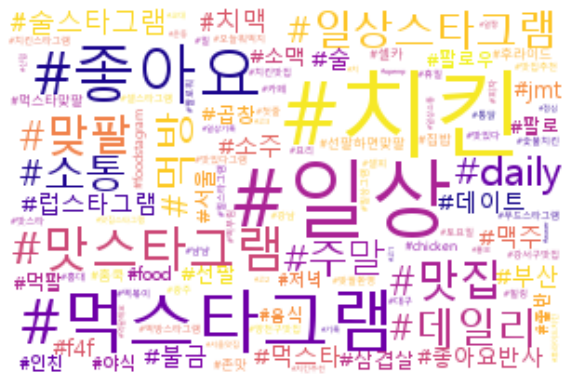

In [39]:
wc_daily= WordCloud(max_font_size=50, background_color="white", max_words=700,
                    colormap = 'plasma', width=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(tag_daily))

plt.figure(figsize=(10,10))
plt.imshow(wc_daily, interpolation="bilinear")
plt.axis("off")

In [136]:
### ÌÉúÍ∑∏Ïóê Í¥ëÍ≥† ÎòêÎäî ÌòëÏ∞¨ÏùÑ Ìè¨Ìï®Ìïú Í≤åÏãúÎ¨º

ad = test[test["Tags"].str.contains("(Í¥ëÍ≥†)|(ÌòëÏ∞¨)")]
ad

C:\Users\user\AppData\Local\Temp\ipykernel_11872\3576502041.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ad = test[test["Tags"].str.contains("(Í¥ëÍ≥†)|(ÌòëÏ∞¨)")]


Category             ID  Post_num  Followers  \
193        ÏπòÌÇ®    eumsikenjoy      30.0       73.0   
212        ÏπòÌÇ®        0rbbang     785.0     3230.0   
232        ÏπòÌÇ®   min_ji_taste     189.0     1375.0   
245        ÏπòÌÇ®  sso_eul_taste     234.0     4718.0   
247        ÏπòÌÇ®  ch_ooha_taste     260.0     3587.0   
...       ...            ...       ...        ...   
1797       ÏπòÌÇ®       food_ono      25.0     2635.0   
1847       ÏπòÌÇ®      seung.y09     447.0     6026.0   
1860       ÏπòÌÇ®         mss2mk    2092.0    57000.0   
1861       ÏπòÌÇ®   moms38_table     271.0     3102.0   
1870       ÏπòÌÇ®      love_uns2    1143.0     5674.0   

                                               Contents  \
193   Ìá¥Í∑ºÌïòÍ≥† Î®πÏùÄ ÎßõÏûàÎäî ÌîºÏûêÏôÄ ÏπòÌÇ®  Îß•Ï£ºÍ∞Ä Îï°Í∏∞ÏßÄÎßå ÎÇ¥ÏùºÏùÑ ÏúÑÌï¥ ÌÉÑÏÇ∞       Ïπò...   
212    ÎãπÏπòÎï°  Î∏îÎûôÌÇπ  ÏπòÌÇ®  ÎßõÏßëÌõÑÍ∏∞  ÌòëÏ∞¨  Ïò§Îäò Ï†ÄÎÖÅÏùÄ ÏóÑÎßàÏôÄ Í±∞ÌïòÍ≤å ÎπµÏª§ÌÉÄÏûÑÏùÑ ...   
232    Ïó∞ÎßêÌöåÏãù Î©îÎâ¥Ï∂îÏ≤ú ÎÅùÎÇòÍ∞ÄÎäî 2022ÎÖÑÎßàÏßÄÎßâ Îã¨Ïù∏ 12ÏõîÏùÑ ÎßûÏù¥Ìï¥Ïàò ÎßéÏùÄ ÏïΩÏÜç  Ìöå...   
245   ÎßõÏûàÎäî ÏπòÌÇ® Îã§Îì§ Í∂ÅÍ∏àÌïòÏßÄ ÏïäÏïÑ  ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠Ïóê ÏãúÍ∑∏ÎãàÏ≤ò Î©îÎâ¥ÌõÑÎ†àÏâ¨ÏåàÎã≠  Ïã±Ïã±Ï∞¨...   
247   ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠ ÏåàÎã≠3Ï¢Ö Ï§ë ÎòêÎù†ÏïÑÏôÄ Ìï®Íªò ÏåàÏã∏Î®πÎäî ÏåàÎã≠ÌôîÌûàÌÉÄ Î≥∂ÏïÑÎÜìÏùÄ ÏïºÏ±ÑÎì§Í≥º Í∞Å...   
...                                                 ...   
1797   ÌòëÏ∞¨ ÎÑ§ÎÑ§ÏπòÌÇ® X ÌóàÎã≠   ÎÑ§Íº¨Îã≠ÎÑ§ÎÑ§ÏπòÌÇ®Í≥º ÌóàÎã≠Ïù¥ ÎßåÎÇ¨Îã§  ÏßëÏóêÏÑúÎèÑ Í∞ÑÌé∏ÌïòÍ≤å Î®πÏùÑ...   
1847   ÌòëÏ∞¨ÏõîÏàòÍ∏àÏùÄ ÌõÑÏ∞∏ Ìï†Ïù∏Î∞õÎäî ÏöîÏùº   Î∞∞Îã¨ÏùòÎØºÏ°± Î∞∞ÎØºÏõê Îß§Ï£º Í∏àÏöîÏùº 2Ï≤úÏõê Ìï†Ïù∏  ...   
1860   ÌòëÏ∞¨ÎÑ§ÎÑ§ÏπòÌÇ®Ïù¥ ÏÉàÎ°úÏö¥ Ïã†Î©îÎâ¥Ïù∏ Î°úÏ†úÍ≤åÌã∞ÏôÄ Îß§ÏΩ§Í≤åÌã∞Í∞Ä ÎÇòÏôîÎç∞Ïöî   Î∞îÏÇ≠Ìïú ÏπòÌÇ®Í≥º Ìï®...   
1861   ÌòëÏ∞¨  Î¨¥Î£åÏ†úÍ≥µ  Î¨¥Î£åÏßÄÏõêÌÇπÏö©Í∞ÄÎ¶¨Í∞Ä ÎÇòÌÉÄÎÇ¨Îã§    ÏúºÎ•¥Î†ÅÎ†ÅÎ†Å     Ïö©Í∞ÄÎ¶¨ ÏπúÍµ¨Îì§...   
1870   ÌòëÏ∞¨  Ïø†Ïñ¥Ïä§Îß•Ï£º Ïñ¥Ï†ú Ïú°Ìá¥ÌõÑ Ïã†Î™ÖÎÇòÍ≤å ÏπòÎß•Î®πÍµ¨ ÌîºÎìúÏò¨Î¶¨Í≥† ÏûêÎ†§Íµ¨ÌñàÎäîÎç∞ Í∏∞Ï†àÌï¥Î≤ÑÎ†∏...   

                                                   Tags  Tags_sum  Tags_count  \
193   #ÏπòÌÇ®, #ÌîºÏûê, #Ìá¥Í∑ºÌõÑ, #Ï†ÄÎÖÅ, #ÏãùÏÇ¨, #ÌïúÎÅº, #Ïò®ÎçîÌÖåÏù¥Î∏î, #Ïã†ÎèÑÎ¶ºÎßõÏßë,...        30           6   
212   #ÎãπÏπòÎï°, #Î∏îÎûôÌÇπ, #ÏπòÌÇ®, #ÎßõÏßëÌõÑÍ∏∞, #ÌòëÏ∞¨, #ÎûúÎç§Î∂ÄÏ†Å, #ÎãπÏπòÎï°Î©îÎâ¥Ï∂îÏ≤ú, ...         8           1   
232   #Ïó∞ÎßêÌöåÏãù, #ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠, #Ïò§Î∏êÍµ¨Ïù¥ÏπòÌÇ®ÏùÑ, #ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠, #ÏπòÌÇ®, #Ïπò...        29           5   
245   #ÏπòÌÇ®ÌååÌã∞üçó, #Îã§Ïù¥Ïñ¥Ìä∏ÏπòÌÇ®, #ÏπòÎß•üçªüçó, #ÏπòÌÇ®Îß•Ï£º, #Ïã†ÎÖÑÌöåÏãù, #ÏπòÌÇ®Îß•Ï£º, #...        26           2   
247   #ÏïºÏãùÏπòÌÇ®, #Îß•Ï£ºÏ†ÑÎ¨∏Ï†ê, #ÏπòÌÇ®ÌïúÎßàÎ¶¨, #ÏπòÌÇ®Í∑∏Îû®, #ÏπòÌÇ®Î®πÎäîÎÇ†, #ÏπòÌÇ®ÏùÄÏÇ¨ÎûëÏûÖÎãà...        26           4   
...                                                 ...       ...         ...   
1797  #ÌòëÏ∞¨, #ÎÑ§ÎÑ§ÏπòÌÇ®, #ÌóàÎã≠, #ÎÑ§Íº¨Îã≠, #ÏπòÌÇ®Ï∂îÏ≤ú, #ÏïºÏãùÏ∂îÏ≤ú, #ÏïàÏÇ∞ÎßõÏßë, #Ïïà...        16           3   
1847  #ÌòëÏ∞¨ÏõîÏàòÍ∏àÏùÄ, #ÌõÑÏ∞∏, #ÌõÑÏ∞∏Ïûò, #ÌõÑÎùºÏù¥ÎìúÏ∞∏ÏûòÌïòÎäîÏßë, #Í∏àÏöîÏùº, #Ï£ºÎßê, #ÏπòÌÇ®...        13           5   
1860  #ÌòëÏ∞¨ÎÑ§ÎÑ§ÏπòÌÇ®Ïù¥, #ÎÑ§ÎÑ§ÏπòÌÇ®, #ÎÑ§ÎÑ§ÏπòÌÇ®Ïã†Î©îÎâ¥, #ÎÑ§ÎÑ§ÏπòÌÇ®ÏÇ¨Ïù¥Îìú, #Íµ≠Î¨ºÍ≤åÌã∞, #Î°ú...        26           4   
1861  #ÌòëÏ∞¨, #Î¨¥Î£åÏ†úÍ≥µ, #Î¨¥Î£åÏßÄÏõêÌÇπÏö©Í∞ÄÎ¶¨Í∞Ä, #Ïö©Í∞ÄÎ¶¨ÏπòÌÇ®, #ÌïòÎ¶º, #Ïö©Í∞ÄÎ¶¨Ïñ¥Î¶∞Ïù¥ÏÑ∏Ìä∏...        19           1   
1870  #ÌòëÏ∞¨, #Ïø†Ïñ¥Ïä§, #Í≤®Ïö∏Îß•Ï£º, #ÏàòÏûÖÎß•Ï£ºÏ∂îÏ≤ú, #Ïà†Ïä§ÌÉÄÍ∑∏Îû®, #ÎùºÍ±∞Îß•Ï£ºÏ∂îÏ≤ú, #ÎØ∏...        30           8   

      Tags_rate  Likes  Scaled_likes  Contents_len  
193       20.00     34      0.005742           210  
212       12.50     19      0.003209           605  
232       17.24      4      0.000676           389  
245        7.69      4      0.000676           320  
247       15.38      7      0.001182           337  
...         ...    ...           ...           ...  
1797      18.75    178      0.030062           437  
1847      38.46     19   

In [137]:
ad_2 = ad.drop_duplicates(['ID'], keep='first')
ad_2

Category             ID  Post_num  Followers  \
193        ÏπòÌÇ®    eumsikenjoy      30.0       73.0   
212        ÏπòÌÇ®        0rbbang     785.0     3230.0   
232        ÏπòÌÇ®   min_ji_taste     189.0     1375.0   
245        ÏπòÌÇ®  sso_eul_taste     234.0     4718.0   
247        ÏπòÌÇ®  ch_ooha_taste     260.0     3587.0   
...       ...            ...       ...        ...   
1797       ÏπòÌÇ®       food_ono      25.0     2635.0   
1847       ÏπòÌÇ®      seung.y09     447.0     6026.0   
1860       ÏπòÌÇ®         mss2mk    2092.0    57000.0   
1861       ÏπòÌÇ®   moms38_table     271.0     3102.0   
1870       ÏπòÌÇ®      love_uns2    1143.0     5674.0   

                                               Contents  \
193   Ìá¥Í∑ºÌïòÍ≥† Î®πÏùÄ ÎßõÏûàÎäî ÌîºÏûêÏôÄ ÏπòÌÇ®  Îß•Ï£ºÍ∞Ä Îï°Í∏∞ÏßÄÎßå ÎÇ¥ÏùºÏùÑ ÏúÑÌï¥ ÌÉÑÏÇ∞       Ïπò...   
212    ÎãπÏπòÎï°  Î∏îÎûôÌÇπ  ÏπòÌÇ®  ÎßõÏßëÌõÑÍ∏∞  ÌòëÏ∞¨  Ïò§Îäò Ï†ÄÎÖÅÏùÄ ÏóÑÎßàÏôÄ Í±∞ÌïòÍ≤å ÎπµÏª§ÌÉÄÏûÑÏùÑ ...   
232    Ïó∞ÎßêÌöåÏãù Î©îÎâ¥Ï∂îÏ≤ú ÎÅùÎÇòÍ∞ÄÎäî 2022ÎÖÑÎßàÏßÄÎßâ Îã¨Ïù∏ 12ÏõîÏùÑ ÎßûÏù¥Ìï¥Ïàò ÎßéÏùÄ ÏïΩÏÜç  Ìöå...   
245   ÎßõÏûàÎäî ÏπòÌÇ® Îã§Îì§ Í∂ÅÍ∏àÌïòÏßÄ ÏïäÏïÑ  ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠Ïóê ÏãúÍ∑∏ÎãàÏ≤ò Î©îÎâ¥ÌõÑÎ†àÏâ¨ÏåàÎã≠  Ïã±Ïã±Ï∞¨...   
247   ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠ ÏåàÎã≠3Ï¢Ö Ï§ë ÎòêÎù†ÏïÑÏôÄ Ìï®Íªò ÏåàÏã∏Î®πÎäî ÏåàÎã≠ÌôîÌûàÌÉÄ Î≥∂ÏïÑÎÜìÏùÄ ÏïºÏ±ÑÎì§Í≥º Í∞Å...   
...                                                 ...   
1797   ÌòëÏ∞¨ ÎÑ§ÎÑ§ÏπòÌÇ® X ÌóàÎã≠   ÎÑ§Íº¨Îã≠ÎÑ§ÎÑ§ÏπòÌÇ®Í≥º ÌóàÎã≠Ïù¥ ÎßåÎÇ¨Îã§  ÏßëÏóêÏÑúÎèÑ Í∞ÑÌé∏ÌïòÍ≤å Î®πÏùÑ...   
1847   ÌòëÏ∞¨ÏõîÏàòÍ∏àÏùÄ ÌõÑÏ∞∏ Ìï†Ïù∏Î∞õÎäî ÏöîÏùº   Î∞∞Îã¨ÏùòÎØºÏ°± Î∞∞ÎØºÏõê Îß§Ï£º Í∏àÏöîÏùº 2Ï≤úÏõê Ìï†Ïù∏  ...   
1860   ÌòëÏ∞¨ÎÑ§ÎÑ§ÏπòÌÇ®Ïù¥ ÏÉàÎ°úÏö¥ Ïã†Î©îÎâ¥Ïù∏ Î°úÏ†úÍ≤åÌã∞ÏôÄ Îß§ÏΩ§Í≤åÌã∞Í∞Ä ÎÇòÏôîÎç∞Ïöî   Î∞îÏÇ≠Ìïú ÏπòÌÇ®Í≥º Ìï®...   
1861   ÌòëÏ∞¨  Î¨¥Î£åÏ†úÍ≥µ  Î¨¥Î£åÏßÄÏõêÌÇπÏö©Í∞ÄÎ¶¨Í∞Ä ÎÇòÌÉÄÎÇ¨Îã§    ÏúºÎ•¥Î†ÅÎ†ÅÎ†Å     Ïö©Í∞ÄÎ¶¨ ÏπúÍµ¨Îì§...   
1870   ÌòëÏ∞¨  Ïø†Ïñ¥Ïä§Îß•Ï£º Ïñ¥Ï†ú Ïú°Ìá¥ÌõÑ Ïã†Î™ÖÎÇòÍ≤å ÏπòÎß•Î®πÍµ¨ ÌîºÎìúÏò¨Î¶¨Í≥† ÏûêÎ†§Íµ¨ÌñàÎäîÎç∞ Í∏∞Ï†àÌï¥Î≤ÑÎ†∏...   

                                                   Tags  Tags_sum  Tags_count  \
193   #ÏπòÌÇ®, #ÌîºÏûê, #Ìá¥Í∑ºÌõÑ, #Ï†ÄÎÖÅ, #ÏãùÏÇ¨, #ÌïúÎÅº, #Ïò®ÎçîÌÖåÏù¥Î∏î, #Ïã†ÎèÑÎ¶ºÎßõÏßë,...        30           6   
212   #ÎãπÏπòÎï°, #Î∏îÎûôÌÇπ, #ÏπòÌÇ®, #ÎßõÏßëÌõÑÍ∏∞, #ÌòëÏ∞¨, #ÎûúÎç§Î∂ÄÏ†Å, #ÎãπÏπòÎï°Î©îÎâ¥Ï∂îÏ≤ú, ...         8           1   
232   #Ïó∞ÎßêÌöåÏãù, #ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠, #Ïò§Î∏êÍµ¨Ïù¥ÏπòÌÇ®ÏùÑ, #ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠, #ÏπòÌÇ®, #Ïπò...        29           5   
245   #ÏπòÌÇ®ÌååÌã∞üçó, #Îã§Ïù¥Ïñ¥Ìä∏ÏπòÌÇ®, #ÏπòÎß•üçªüçó, #ÏπòÌÇ®Îß•Ï£º, #Ïã†ÎÖÑÌöåÏãù, #ÏπòÌÇ®Îß•Ï£º, #...        26           2   
247   #ÏïºÏãùÏπòÌÇ®, #Îß•Ï£ºÏ†ÑÎ¨∏Ï†ê, #ÏπòÌÇ®ÌïúÎßàÎ¶¨, #ÏπòÌÇ®Í∑∏Îû®, #ÏπòÌÇ®Î®πÎäîÎÇ†, #ÏπòÌÇ®ÏùÄÏÇ¨ÎûëÏûÖÎãà...        26           4   
...                                                 ...       ...         ...   
1797  #ÌòëÏ∞¨, #ÎÑ§ÎÑ§ÏπòÌÇ®, #ÌóàÎã≠, #ÎÑ§Íº¨Îã≠, #ÏπòÌÇ®Ï∂îÏ≤ú, #ÏïºÏãùÏ∂îÏ≤ú, #ÏïàÏÇ∞ÎßõÏßë, #Ïïà...        16           3   
1847  #ÌòëÏ∞¨ÏõîÏàòÍ∏àÏùÄ, #ÌõÑÏ∞∏, #ÌõÑÏ∞∏Ïûò, #ÌõÑÎùºÏù¥ÎìúÏ∞∏ÏûòÌïòÎäîÏßë, #Í∏àÏöîÏùº, #Ï£ºÎßê, #ÏπòÌÇ®...        13           5   
1860  #ÌòëÏ∞¨ÎÑ§ÎÑ§ÏπòÌÇ®Ïù¥, #ÎÑ§ÎÑ§ÏπòÌÇ®, #ÎÑ§ÎÑ§ÏπòÌÇ®Ïã†Î©îÎâ¥, #ÎÑ§ÎÑ§ÏπòÌÇ®ÏÇ¨Ïù¥Îìú, #Íµ≠Î¨ºÍ≤åÌã∞, #Î°ú...        26           4   
1861  #ÌòëÏ∞¨, #Î¨¥Î£åÏ†úÍ≥µ, #Î¨¥Î£åÏßÄÏõêÌÇπÏö©Í∞ÄÎ¶¨Í∞Ä, #Ïö©Í∞ÄÎ¶¨ÏπòÌÇ®, #ÌïòÎ¶º, #Ïö©Í∞ÄÎ¶¨Ïñ¥Î¶∞Ïù¥ÏÑ∏Ìä∏...        19           1   
1870  #ÌòëÏ∞¨, #Ïø†Ïñ¥Ïä§, #Í≤®Ïö∏Îß•Ï£º, #ÏàòÏûÖÎß•Ï£ºÏ∂îÏ≤ú, #Ïà†Ïä§ÌÉÄÍ∑∏Îû®, #ÎùºÍ±∞Îß•Ï£ºÏ∂îÏ≤ú, #ÎØ∏...        30           8   

      Tags_rate  Likes  Scaled_likes  Contents_len  
193       20.00     34      0.005742           210  
212       12.50     19      0.003209           605  
232       17.24      4      0.000676           389  
245        7.69      4      0.000676           320  
247       15.38      7      0.001182           337  
...         ...    ...           ...           ...  
1797      18.75    178      0.030062           437  
1847      38.46     19   

In [138]:
# daily Î≥¥Îã§ Ïôú ÌèâÍ∑† Ï¢ãÏïÑÏöî ÏàòÍ∞Ä ÎÜíÏùÑÍπå?

print('Í¥ëÍ≥†,ÌòëÏ∞¨ Í≤åÏãúÎ¨º')
print('ÌèâÍ∑† Ï¢ãÏïÑÏöîÏàò : ', round(ad['Likes'].mean(),1))
print('ÌèâÍ∑† Î≥∏Î¨∏Í∏ÄÏûêÏàò : ', round(ad['Contents_len'].mean(),1))
print('ÌèâÍ∑† ÏÇ¨Ïö©Îêú ÌÉúÍ∑∏Ïàò : ', round(ad['Tags_sum'].mean(),1))
print('---------------------------------------------------------------------------------------')

print('ÌèâÍ∑† ÌåîÎ°úÏõå Ïàò : ', round(ad_2['Followers'].mean(),1))

ad["ID"].nunique()

Í¥ëÍ≥†,ÌòëÏ∞¨ Í≤åÏãúÎ¨º
ÌèâÍ∑† Ï¢ãÏïÑÏöîÏàò :  74.2
ÌèâÍ∑† Î≥∏Î¨∏Í∏ÄÏûêÏàò :  355.4
ÌèâÍ∑† ÏÇ¨Ïö©Îêú ÌÉúÍ∑∏Ïàò :  24.4
---------------------------------------------------------------------------------------
ÌèâÍ∑† ÌåîÎ°úÏõå Ïàò :  11146.4


97

In [50]:
Tag = []
for i in ad["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#ÏπòÌÇ®',
 '#ÌîºÏûê',
 '#Ìá¥Í∑ºÌõÑ',
 '#Ï†ÄÎÖÅ',
 '#ÏãùÏÇ¨',
 '#ÌïúÎÅº',
 '#Ïò®ÎçîÌÖåÏù¥Î∏î',
 '#Ïã†ÎèÑÎ¶ºÎßõÏßë',
 '#ÏÑúÏö∏ÎßõÏßë',
 '#Î®πÎ∞©',
 '#Î®πÎ∂ÄÎ¶º',
 '#Ï¢ãÏïÑÏöîÎ∞òÏÇ¨',
 '#Ï¢ãÎ∞ò',
 '#Ï†ÄÎÖÅÎ©îÎâ¥',
 '#Ï†ÄÎÖÅÏ∂îÏ≤ú',
 '#Ïò§ÎäòÎ≠êÎ®πÏßÄ',
 '#ÏïºÏãù',
 '#ÏïºÏãùÎßõÏßë',
 '#ÏπòÌÇ®ÎßõÏßë',
 '#ÎÇ¥ÎèàÎÇ¥Î®π',
 '#ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®',
 '#ÏûòÎ®πÏóàÏäµÎãàÎã§',
 '#Î∞∞Î∂ÄÎ¶Ñ',
 '#Î®πÌåî',
 '#Î®πÏä§ÌÉÄÎßûÌåî',
 '#ÌòëÏ∞¨Î¨∏Ïùò',
 '#ÎßõÏûàÎã§',
 '#Ï∂îÏ≤úÎßõÏßë',
 '#ÎòêÎ®πÍ≥†Ïã∂Îã§',
 '#ÏöîÍ∏∞',
 '#ÎãπÏπòÎï°',
 '#Î∏îÎûôÌÇπ',
 '#ÏπòÌÇ®',
 '#ÎßõÏßëÌõÑÍ∏∞',
 '#ÌòëÏ∞¨',
 '#ÎûúÎç§Î∂ÄÏ†Å',
 '#ÎãπÏπòÎï°Î©îÎâ¥Ï∂îÏ≤ú',
 '#ÎãπÏπòÎï°Ï∂î',
 '#Ïó∞ÎßêÌöåÏãù',
 '#ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠',
 '#Ïò§Î∏êÍµ¨Ïù¥ÏπòÌÇ®ÏùÑ',
 '#ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠',
 '#ÏπòÌÇ®',
 '#ÏπòÌÇ®ÎßõÏßë',
 '#Ïã†ÎÖÑÌöåÎ™®ÏûÑ',
 '#ÏåàÎã≠',
 '#ÏπòÌÇ®Îß•Ï£º',
 '#ÏïºÏãùÏπòÌÇ®',
 '#ÏπòÌÇ®ÏπòÌÇ®',
 '#Ï°¥ÎßõÌÉ±Íµ¨Î¶¨',
 '#ÏπòÌÇ®Î©îÎâ¥Ï∂îÏ≤ú',
 '#Îß•Ï£ºÏ†ÑÎ¨∏Ï†ê',
 '#ÏπòÎß•',
 '#ÎßõÏßë',
 '#Ïò§Î∏êÏπòÌÇ®Íµ¨Ïù¥',
 '#ÏπòÌÇ®ÌïúÎßàÎ¶¨',
 '#ÏπòÌÇ®Î

In [51]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

ad_tag = tag_count.most_common()
ad_tag

[('#ÏπòÌÇ®', 101),
 ('#ÏπòÌÇ®ÎßõÏßë', 85),
 ('#ÎàÑÍµ¨ÎÇòÌôÄÎî±Î∞òÌïúÎã≠', 78),
 ('#Ïã†ÎÖÑÌöåÎ™®ÏûÑ', 77),
 ('#ÏåàÎã≠', 77),
 ('#Í¥ë', 77),
 ('#ÏπòÌÇ®Î®πÎäîÎÇ†', 62),
 ('#ÏπòÌÇ®Îß•Ï£º', 60),
 ('#ÏπòÌÇ®Î®πÎ∞©', 54),
 ('#ÏïºÏãùÏπòÌÇ®', 52),
 ('#Îß•Ï£ºÏ†ÑÎ¨∏Ï†ê', 52),
 ('#ÏπòÌÇ®ÌïúÎßàÎ¶¨', 52),
 ('#ÏπòÌÇ®Í∑∏Îû®', 52),
 ('#ÏπòÎß•', 36),
 ('#ÎßõÏßë', 35),
 ('#ÏπòÌÇ®Î©îÎâ¥Ï∂îÏ≤ú', 32),
 ('#ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®üçó', 32),
 ('#Ïã†ÎÖÑÌååÌã∞üéâ', 32),
 ('#Ïò§Î∏êÏπòÌÇ®', 32),
 ('#ÏπòÌÇ®ÏπòÌÇ®', 31),
 ('#Ïò§Î∏êÏπòÌÇ®Íµ¨Ïù¥', 31),
 ('#Îß•Ï£ºÏïàÏ£º', 31),
 ('#ÏπòÎäêÎãò', 31),
 ('#ÏπòÌÇ®Ï∂îÏ≤ú', 30),
 ('#ÏπòÌÇ®Ïä§ÌÉÄÍ∑∏Îû®', 29),
 ('#ÏπòÌÇ®ÌååÌã∞üçó', 28),
 ('#Îã§Ïù¥Ïñ¥Ìä∏ÏπòÌÇ®', 28),
 ('#ÏπòÎß•üçªüçó', 28),
 ('#Ïã†ÎÖÑÌöåÏãù', 28),
 ('#Ï°¥ÎßõÌÉ±Íµ¨Î¶¨', 27),
 ('#ÏπòÏèò', 27),
 ('#ÏπòÌÇ®Ïßë', 27),
 ('#Î∞∞Îã¨ÎßõÏßë', 27),
 ('#ÏπòÌÇ®ÏùÄÏÇ¨Îûë', 25),
 ('#ÏïºÏãùÎ©îÎâ¥', 24),
 ('#Ïã†ÎÖÑÌöå', 24),
 ('#ÎßõÏûàÎäîÏπòÌÇ®', 23),
 ('#ÏπòÌÇ®Ïù¥Îã≠', 23),
 ('#Ïò§Î∏êÍµ¨Ïù¥', 23),
 ('#Î∞∞Îã¨ÎßõÏßëÏ∂îÏ≤ú', 18),
 ('#

(-0.5, 299.5, 199.5, -0.5)

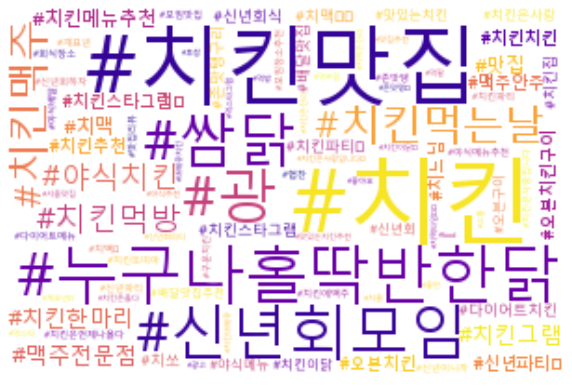

In [52]:
wc_ad= WordCloud(max_font_size=50, background_color="white", max_words=700,
                    colormap = 'plasma', width=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(ad_tag))

plt.figure(figsize=(10,10))
plt.imshow(wc_ad, interpolation="bilinear")
plt.axis("off")

# Îç∞ÏùºÎ¶¨ Î≥¥Îã§.... Ï¢Ä Îçî Î™©Ï†ÅÏÑ±Ïù¥ ÏûàÎäî ÌÇ§ÏõåÎìú 

### Ï§ëÎ≥µ ÏïÑÏù¥Îîî _ Í≥ÑÏ†ï Î∂ÑÏÑù 

In [93]:
result=test[test["Tags"].str.contains("(Í¥ëÍ≥†)|(ÌòëÏ∞¨)|(ÏùºÏÉÅ)")]

C:\Users\user\AppData\Local\Temp\ipykernel_11872\3997589439.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  result=test[test["Tags"].str.contains("(Í¥ëÍ≥†)|(ÌòëÏ∞¨)|(ÏùºÏÉÅ)")]


In [120]:
result[result['ID']=='ssaranghae_u']

Category            ID  Post_num  Followers  \
682       ÏπòÌÇ®  ssaranghae_u    2472.0    71000.0   

                                              Contents  \
682   ÌòëÏ∞¨ÏπòÌÇ®ÏùÄ Ïñ∏Ï†úÎÇò ÎßõÎÇòÎßõÎÇò ÎßõÎÇú ÏπòÌÇ®Í≥º Ìï®Íªò Î®πÏúºÎ©¥ Îçî ÎßõÏûàÎäî ÏÇ¨Ïù¥ÎìúÎ©îÎâ¥Í∞Ä ÎÑ§ÎÑ§Ïπò...   

                                                  Tags  Tags_sum  Tags_count  \
682  #ÌòëÏ∞¨ÏπòÌÇ®ÏùÄ, #ÎÑ§ÎÑ§ÏπòÌÇ®, #ÎÑ§ÎÑ§ÏπòÌÇ®Ïã†Î©îÎâ¥, #ÎÑ§ÎÑ§ÏπòÌÇ®ÏÇ¨Ïù¥Îìú, #Íµ≠Î¨ºÍ≤åÌã∞, #Î°úÏ†úÍ≤å...         9           0   

     Tags_rate  Likes  Scaled_likes  Contents_len  
682        0.0     19      0.003209           395

In [115]:
t1=result[result["ID"]=='9697s_2']
t1

Category       ID  Post_num  Followers  \
740       ÏπòÌÇ®  9697s_2     621.0      131.0   
741       ÏπòÌÇ®  9697s_2     621.0      131.0   
742       ÏπòÌÇ®  9697s_2     621.0      131.0   

                                              Contents  \
740   Î®πÏä§ÌÉÄÍ∑∏Îû® ÎßõÏßëÏ∂îÏ≤ú Ï≤≠Ï£ºÎßõÏßë Î®πÎ∞© Î®πÏä§ÌÉÄ Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû® Î®πÎ∂ÄÎ¶º Î®πÌåî ÎßõÏßëÌÉêÎ∞© Îç∞Ïù¥Ìä∏...   
741   Î®πÏä§ÌÉÄÍ∑∏Îû® ÎßõÏßëÏ∂îÏ≤ú Ï≤≠Ï£ºÎßõÏßë Î®πÎ∞© Î®πÏä§ÌÉÄ Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû® Î®πÎ∂ÄÎ¶º Î®πÌåî ÎßõÏßëÌÉêÎ∞© Îç∞Ïù¥Ìä∏...   
742   Î®πÏä§ÌÉÄÍ∑∏Îû® ÎßõÏßëÏ∂îÏ≤ú Ï≤≠Ï£ºÎßõÏßë Î®πÎ∞© Î®πÏä§ÌÉÄ Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû® Î®πÎ∂ÄÎ¶º Î®πÌåî ÎßõÏßëÌÉêÎ∞© Îç∞Ïù¥Ìä∏...   

                                                  Tags  Tags_sum  Tags_count  \
740  #Î®πÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏßëÏ∂îÏ≤ú, #Ï≤≠Ï£ºÎßõÏßë, #Î®πÎ∞©, #Î®πÏä§ÌÉÄ, #Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®, #Î®πÎ∂ÄÎ¶º...        30           9   
741  #Î®πÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏßëÏ∂îÏ≤ú, #Ï≤≠Ï£ºÎßõÏßë, #Î®πÎ∞©, #Î®πÏä§ÌÉÄ, #Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®, #Î®πÎ∂ÄÎ¶º...        30           9   
742  #Î®πÏä§ÌÉÄÍ∑∏Îû®, #ÎßõÏßëÏ∂îÏ≤ú, #Ï≤≠Ï£ºÎßõÏßë, #Î®πÎ∞©, #Î®πÏä§ÌÉÄ, #Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®, #Î®πÎ∂ÄÎ¶º...        29           9   

     Tags_rate  Likes  Scaled_likes  Contents_len  
740      30.00     22      0.003716           128  
741      30.00     26      0.004391           128  
742      31.03     17      0.002871           125

In [116]:
Tag = []
for i in t1["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#Î®πÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏßëÏ∂îÏ≤ú',
 '#Ï≤≠Ï£ºÎßõÏßë',
 '#Î®πÎ∞©',
 '#Î®πÏä§ÌÉÄ',
 '#Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®',
 '#Î®πÎ∂ÄÎ¶º',
 '#Î®πÌåî',
 '#ÎßõÏßëÌÉêÎ∞©',
 '#Îç∞Ïù¥Ìä∏',
 '#Îç∞Ïù¥Ìä∏ÎßõÏßë',
 '#ÎßõÏßë',
 '#Ï¢ãÎ∞ò',
 '#ÏÜåÌÜµ',
 '#ÌòëÏ∞¨',
 '#food',
 '#ÎßûÌåîÌï¥Ïöî',
 '#ÏÑ†ÌåîÌõÑÎßûÌåî',
 '#ÏÑúÏö∏ÎßõÏßë',
 '#ÏÜåÍ≥†Í∏∞',
 '#selfie',
 '#ÏÇºÍ≤πÏÇ¥',
 '#ÎßõÏ†ê',
 '#ÎßõÏ†Ä',
 '#Ï≤≠Ï£º',
 '#ÏóΩÎñ°',
 '#Ï†êÎ©îÏ∂î',
 '#ÏπòÌÇ®',
 '#ÌåîÎ°úÏö∞',
 '#ÏÑú',
 '#Î®πÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏßëÏ∂îÏ≤ú',
 '#Ï≤≠Ï£ºÎßõÏßë',
 '#Î®πÎ∞©',
 '#Î®πÏä§ÌÉÄ',
 '#Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®',
 '#Î®πÎ∂ÄÎ¶º',
 '#Î®πÌåî',
 '#ÎßõÏßëÌÉêÎ∞©',
 '#Îç∞Ïù¥Ìä∏',
 '#Îç∞Ïù¥Ìä∏ÎßõÏßë',
 '#ÎßõÏßë',
 '#Ï¢ãÎ∞ò',
 '#ÏÜåÌÜµ',
 '#ÌòëÏ∞¨',
 '#food',
 '#ÎßûÌåîÌï¥Ïöî',
 '#ÏÑ†ÌåîÌõÑÎßûÌåî',
 '#ÏÑúÏö∏ÎßõÏßë',
 '#ÏÜåÍ≥†Í∏∞',
 '#selfie',
 '#ÏÇºÍ≤πÏÇ¥',
 '#ÎßõÏ†ê',
 '#ÎßõÏ†Ä',
 '#Ï≤≠Ï£º',
 '#ÏóΩÎñ°',
 '#Ï†êÎ©îÏ∂î',
 '#ÏπòÌÇ®',
 '#ÌåîÎ°úÏö∞',
 '#ÏÑú',
 '#Î®πÏä§ÌÉÄÍ∑∏Îû®',
 '#ÎßõÏßëÏ∂îÏ≤ú',
 '#Ï≤≠Ï£ºÎßõÏßë',
 '#Î®πÎ∞©',
 '#Î®πÏä§ÌÉÄ',
 '#Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®',
 '

In [117]:
from collections import Counter
tag_count = Counter(Tag)
tag_count

tags = tag_count.most_common()
tags

[('#Î®πÏä§ÌÉÄÍ∑∏Îû®', 3),
 ('#ÎßõÏßëÏ∂îÏ≤ú', 3),
 ('#Ï≤≠Ï£ºÎßõÏßë', 3),
 ('#Î®πÎ∞©', 3),
 ('#Î®πÏä§ÌÉÄ', 3),
 ('#Î®πÎ∞©Ïä§ÌÉÄÍ∑∏Îû®', 3),
 ('#Î®πÎ∂ÄÎ¶º', 3),
 ('#Î®πÌåî', 3),
 ('#ÎßõÏßëÌÉêÎ∞©', 3),
 ('#Îç∞Ïù¥Ìä∏', 3),
 ('#Îç∞Ïù¥Ìä∏ÎßõÏßë', 3),
 ('#ÎßõÏßë', 3),
 ('#Ï¢ãÎ∞ò', 3),
 ('#ÏÜåÌÜµ', 3),
 ('#ÌòëÏ∞¨', 3),
 ('#food', 3),
 ('#ÎßûÌåîÌï¥Ïöî', 3),
 ('#ÏÑ†ÌåîÌõÑÎßûÌåî', 3),
 ('#ÏÑúÏö∏ÎßõÏßë', 3),
 ('#ÏÜåÍ≥†Í∏∞', 3),
 ('#selfie', 3),
 ('#ÏÇºÍ≤πÏÇ¥', 3),
 ('#ÎßõÏ†ê', 3),
 ('#ÎßõÏ†Ä', 3),
 ('#Ï≤≠Ï£º', 3),
 ('#ÏóΩÎñ°', 3),
 ('#Ï†êÎ©îÏ∂î', 3),
 ('#ÏπòÌÇ®', 3),
 ('#ÌåîÎ°úÏö∞', 2),
 ('#ÏÑú', 2),
 ('#ÌåîÎ°ú', 1)]